In [2]:
%run /u/cmor/jupyter/HP_project/main.ipynb

In [3]:
def resplot():
    for n in reversed(range(100, len(np.diff(a_orig)))):
        if np.abs(np.average(np.diff(a_orig[n-20:n+20]))) > 0.00004:
            break
    dif = np.diff(a_orig)
#     plt.figure()
#     plt.plot(t_orig[10:], np.diff(a_orig[9:]), linewidth=1)
#     plt.scatter(t_orig[n], dif[n], s=15, c='red')
#     plt.show()

    plt.figure()
    plt.plot(t_orig, a_orig, linewidth=1)
    plt.scatter(t_orig[n], a_orig[n], s=15, c='red')
    plt.show()

    return

# plt.plot(t_orig[10:], a_orig[10:])

/raven/u/cmor/jupyter/HP_project/data/LHD/surface


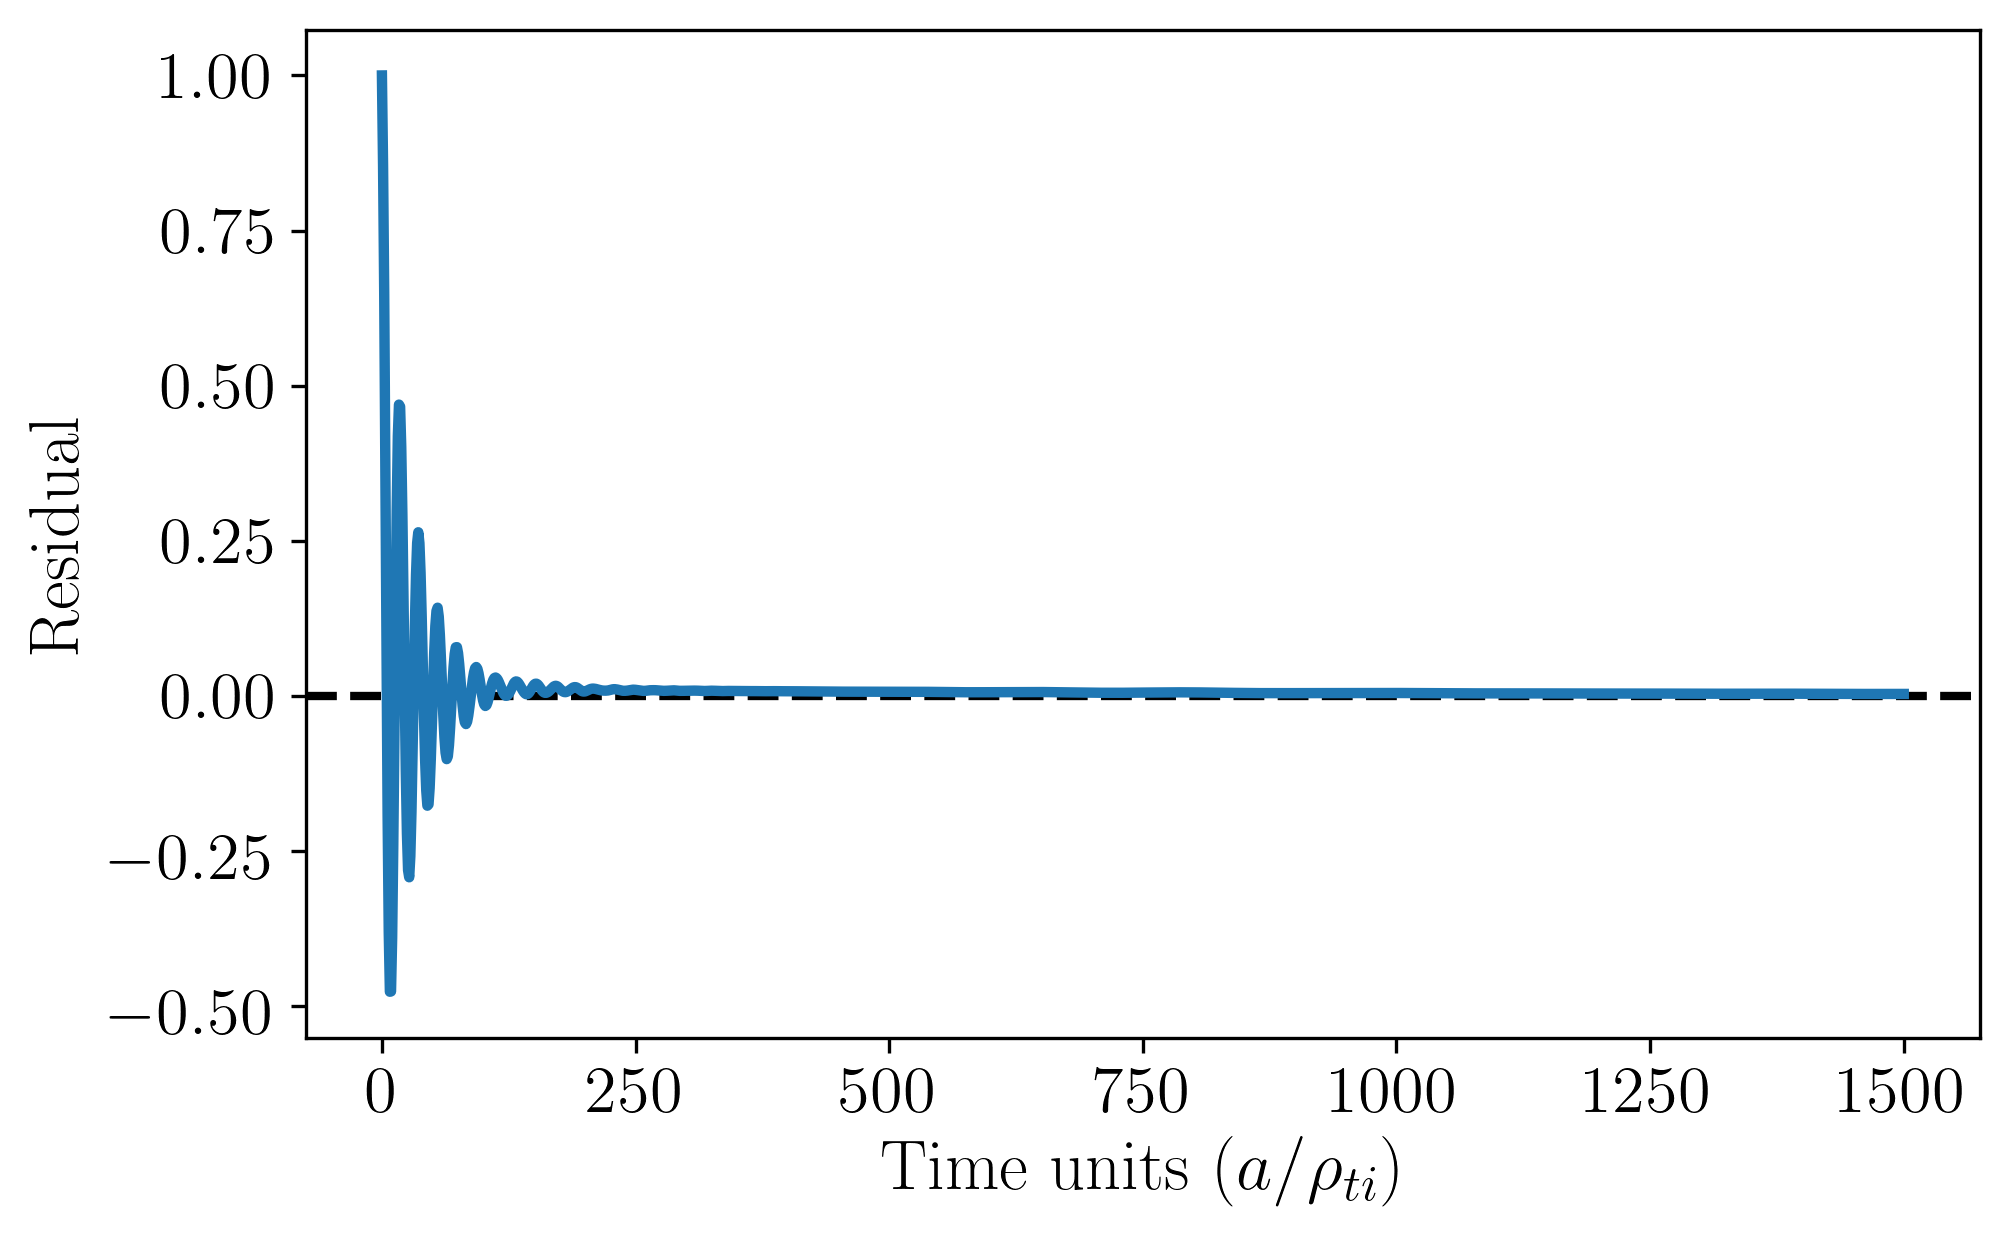

In [4]:
%cd /raven/u/cmor/jupyter/HP_project/data/LHD/surface
label   = "surface"
plot = 'modulus'
log = False
    
# Start plotting details, label and title
if plot != None:
    plt.figure()
    plt.xlabel('Time units $(a/\\rho_{ti})$')
    plt.ylabel(r"Residual")
    plt.axhline(y=0, color='black', linewidth=2, linestyle='dashed')  # Have a reference of zero

# End plotting details

all_r = []

gam = pylab.loadtxt("timetraceions_0002.dat")

a = np.divide(gam[:, 1], gam[0, 1], out=np.zeros_like(gam[:, 1]),
              where=gam[0, 1] != 0)  # The real component
b = np.divide(gam[:, 2], gam[0, 1], out=np.zeros_like(gam[:, 2]),
              where=gam[0, 1] != 0)  # Imaginary component
E = np.sqrt(a**2 + b**2)  # Modulus

t = gam[:, 0]  # Time

t_orig = t
a_orig = a

kekke = 100
keeke = len(t)

for n in range(keeke-1, keeke):

    all_r = np.append(all_r, a[n])


    if plot == 'real':
        if log == True:
            plt.yscale('log')
#             plt.plot(t, result.init_fit, label=r"Initial guess")
#             plt.plot(t, result.best_fit, linewidth=2, label=r"Best fit")
#             plt.plot(t, gene_fit(t, A=A_sug, g=g_sug, w=w_sug, d=0), label="Sugama's")
#             plt.plot(t, gene_fit(t, A=A_gao, g=g_gao, w=w_gao, d=0), label="Gao's")
    plt.plot(t, a, label='{0}'.format(Lx_scan))  # , color=color)
#     plt.plot(t, b, label='{0}'.format(Lx_scan))  # , color=color)
#     if plot == 'modulus':
#         if log == True:
#             plt.yscale('log')
#         plt.plot(t, E, label='{0}'.format(label))  # , color=color)

if plot != None:
    plt.show()

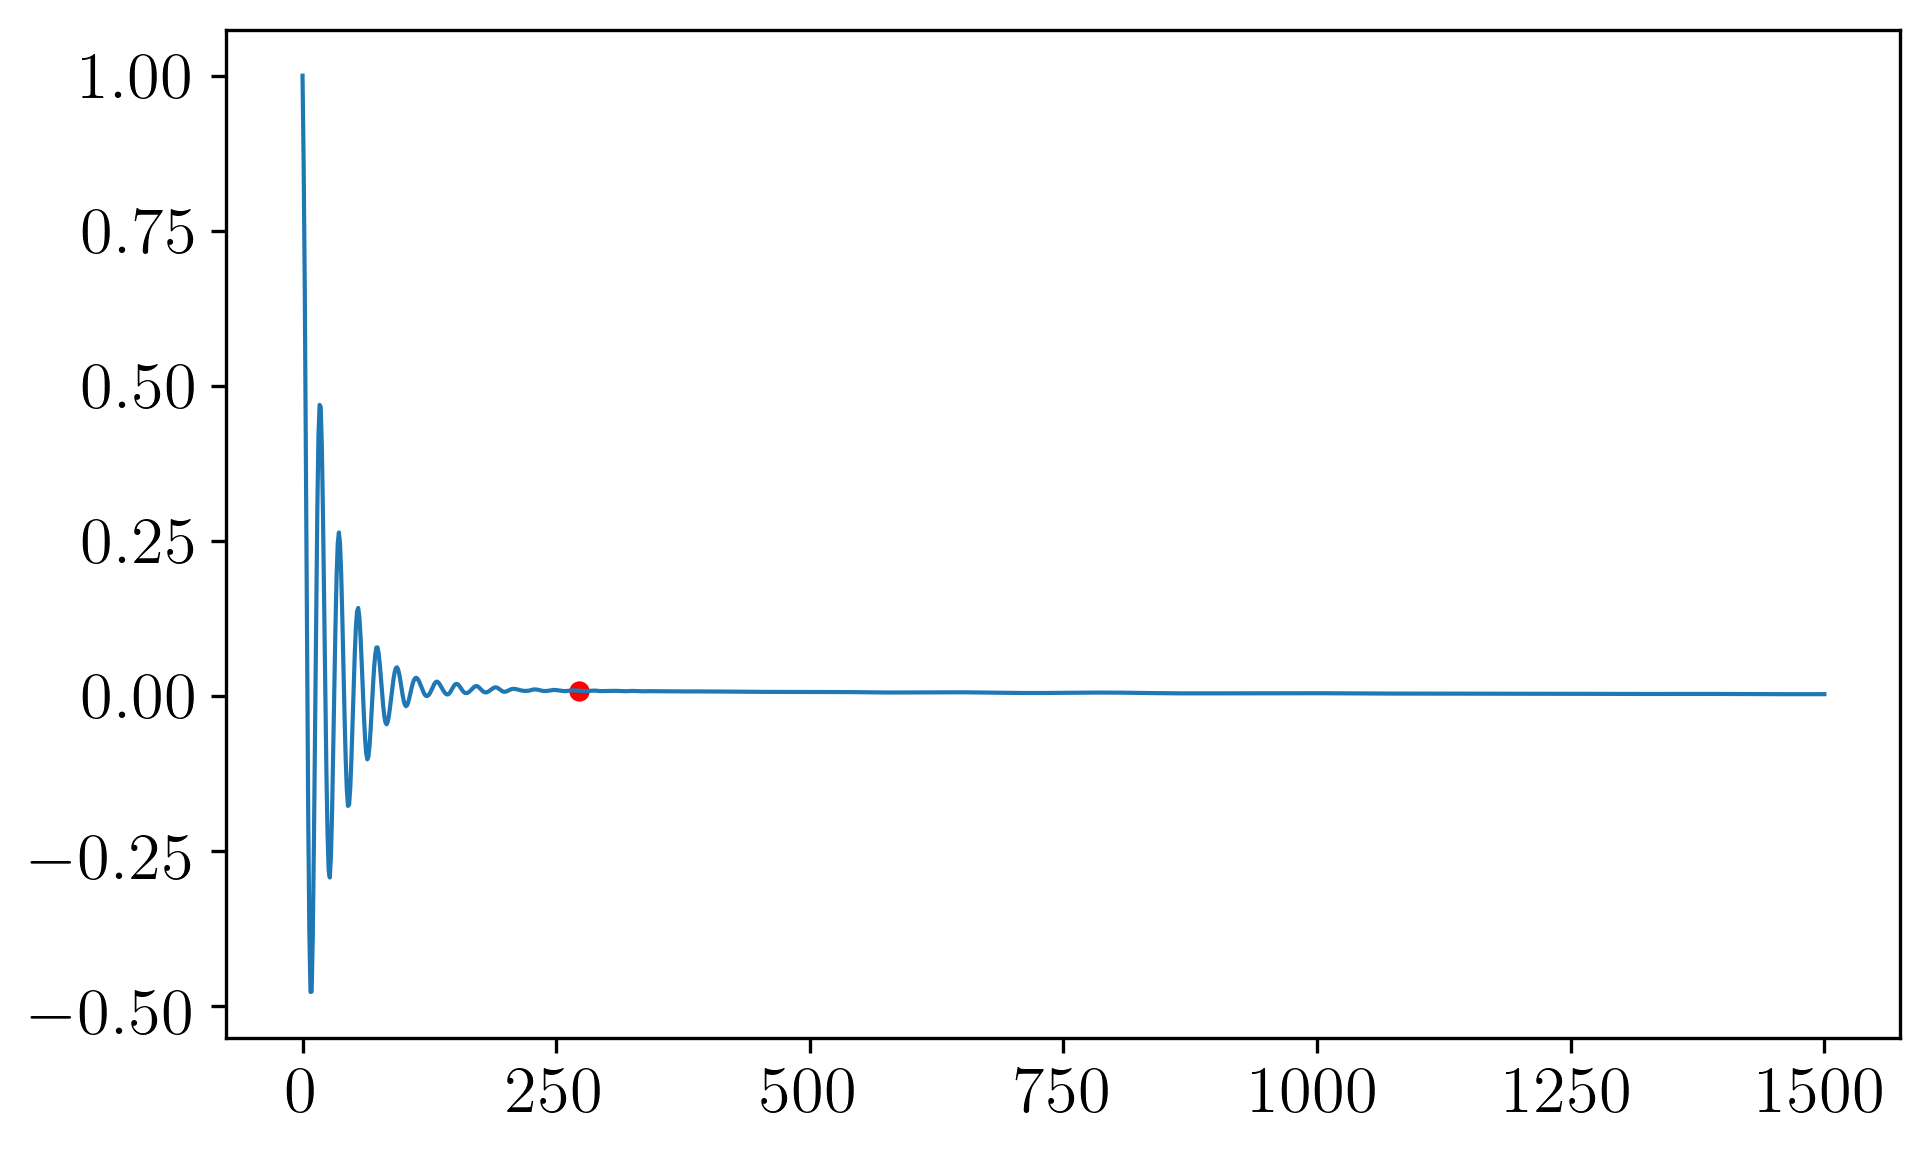

In [5]:
resplot()

/raven/u/cmor/jupyter/HP_project/data/w7x_kjm30/surface_long_time
[[Model]]
    Model(gene_fit)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 64
    # data points      = 4132
    # variables        = 4
    chi-square         = 1.93213494
    reduced chi-square = 4.6806e-04
    Akaike info crit   = -31675.7267
    Bayesian info crit = -31650.4206
[[Variables]]
    A:  0.01063250 +/- 6.8131e-04 (6.41%) (init = 0.1)
    g:  0.00674836 +/- 5.5139e-05 (0.82%) (init = 0.01)
    w:  0.01711388 +/- 5.2253e-05 (0.31%) (init = 0.06)
    d:  1.3631e-06 +/- 1.1768e-07 (8.63%) (init = 0)
[[Correlations]] (unreported correlations are < 0.100)
    C(A, d) =  0.869
    C(A, g) = -0.144
    C(g, d) = -0.125
[[Model]]
    Model(edi_fit)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 109
    # data points      = 4132
    # variables        = 4
    chi-square         = 1.47734899
    reduced chi-square = 3.5788e-04
    Akaike info crit   = -3278

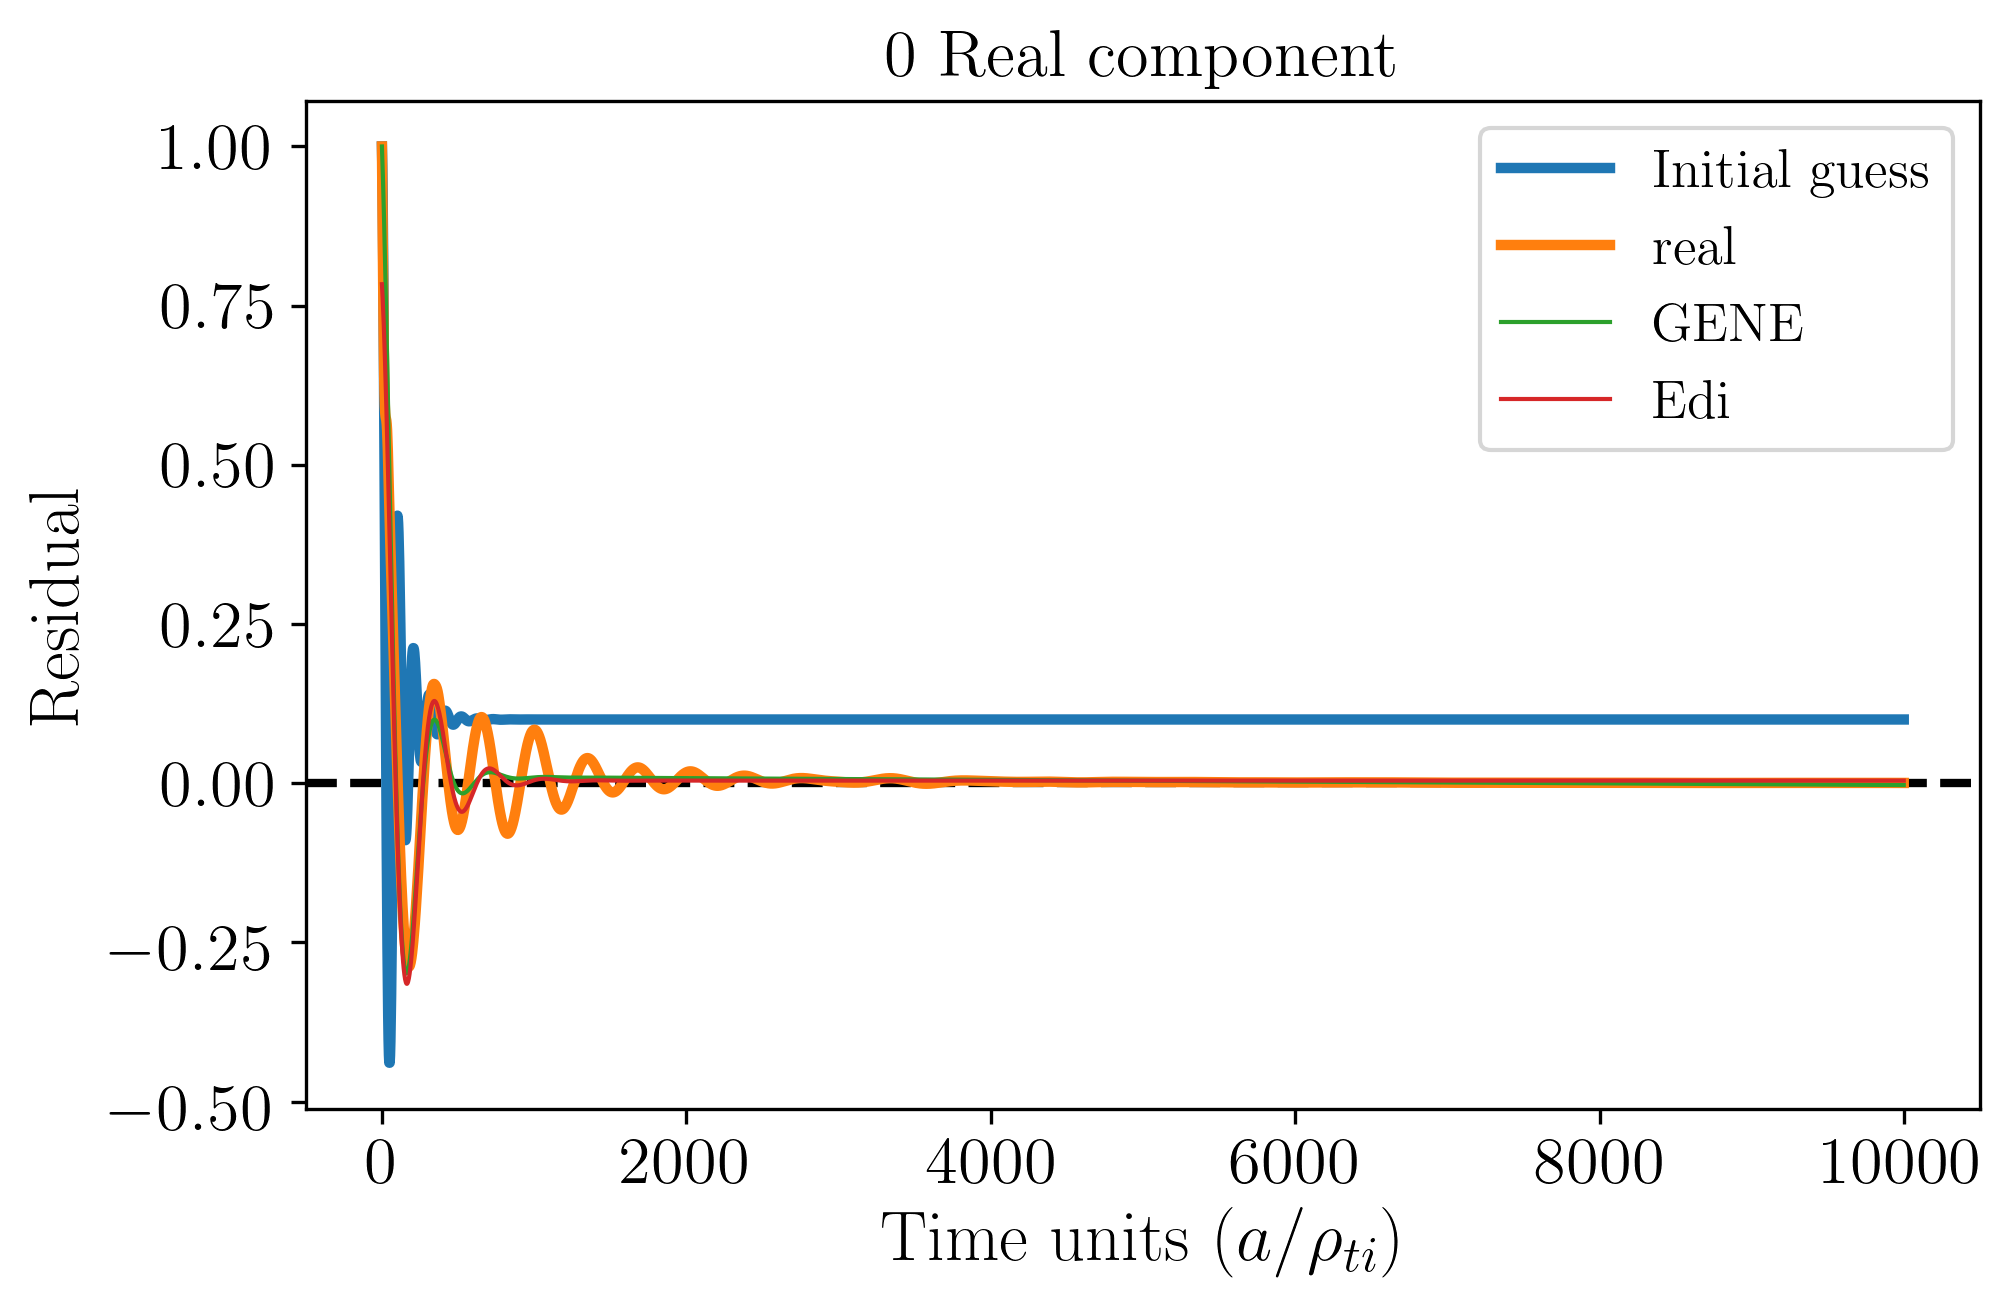

In [6]:
%cd /raven/u/cmor/jupyter/HP_project/data/w7x_kjm30/surface_long_time
label   = "surface"
plot = 'real'
log = False
t0 = 0
tf = 10000
    
# Start plotting details, label and title
if plot != None:
    plt.figure()
    plt.xlabel('Time units $(a/\\rho_{ti})$')
    plt.ylabel(r"Residual")
    plt.axhline(y=0, color='black', linewidth=2, linestyle='dashed')  # Have a reference of zero
    if plot == 'real':  # Normally you choose the real component
        plt.title(r"{0} Real component")
    if plot == 'modulus':
        plt.title(r"{0} Modulus")

# End plotting details

all_r = []

gam = pylab.loadtxt("timetraceions_0001.dat")

a = np.divide(gam[:, 1], gam[0, 1], out=np.zeros_like(gam[:, 1]),
              where=gam[0, 1] != 0)  # The real component
b = np.divide(gam[:, 2], gam[0, 1], out=np.zeros_like(gam[:, 2]),
              where=gam[0, 1] != 0)  # Imaginary component
E = np.sqrt(a**2 + b**2)  # Modulus

t = gam[:, 0]  # Time

if t0 != None:
    ini = (np.abs(t - t0)).argmin()
else:
    ini = (np.abs(t - t[0])).argmin()
if tf != None:
    fin = (np.abs(t - tf)).argmin()
else:
    fin = (np.abs(t - t[-1])).argmin()

mil = (np.abs(t - 500)).argmin()
all_r = np.append(all_r, a[mil])

t_orig = t
a_orig = a

a = a[ini:fin]
E = E[ini:fin]
t = t[ini:fin]

gmodel = lmfit.Model(gene_fit)
pars = gmodel.make_params(A=0.1, g=0.01, w=0.06, d=0)

result = gmodel.fit(a, pars, t=t, nan_policy='propagate')

print(result.fit_report())


gmodel2 = lmfit.Model(edi_fit)
pars2 = gmodel2.make_params(A=result.best_values.get("A"),
                            g=result.best_values.get("g"),
                            w=result.best_values.get("w"), R=0.1)
result2 = gmodel2.fit(a, pars2, t=t, nan_policy='propagate')
print(result2.fit_report())

if plot == 'real':
    if log == True:
        plt.yscale('log')
    plt.plot(t, result.init_fit, label=r"Initial guess")
#     plt.plot(t, result.best_fit, linewidth=2, label=r"Best fit")
    plt.plot(t, a, label='real')
    plt.plot(t, result.best_fit, linewidth=1, label=r"GENE")
    plt.plot(t, result2.best_fit, linewidth=1, label=r"Edi")
#             plt.plot(t, gene_fit(t, A=A_sug, g=g_sug, w=w_sug, d=0), label="Sugama's")
#             plt.plot(t, gene_fit(t, A=A_gao, g=g_gao, w=w_gao, d=0), label="Gao's")
if plot == 'modulus':
    if log == True:
        plt.yscale('log')
    plt.plot(t, E, label='{0}'.format(label))  # , color=color))

if plot != None:
    plt.legend()
    plt.show()

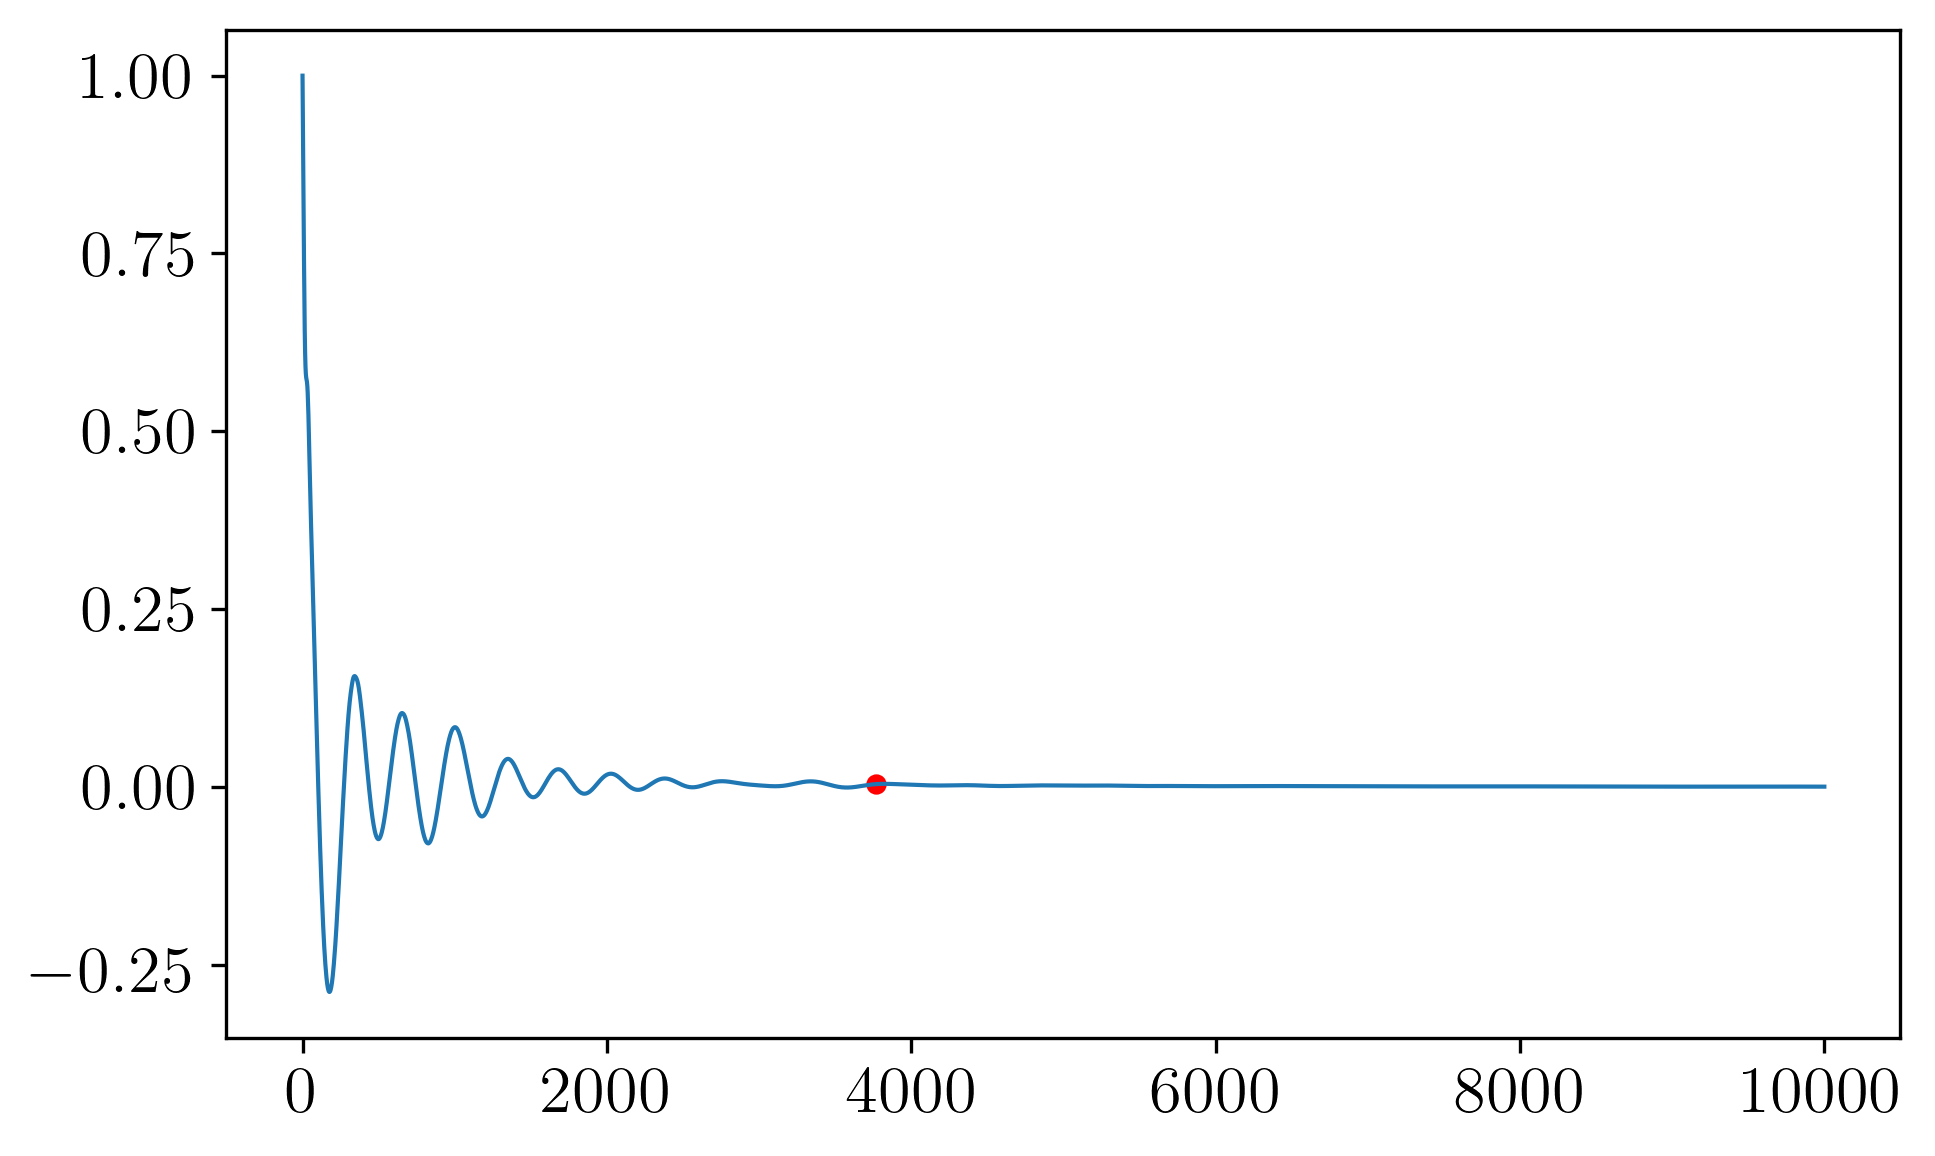

In [7]:
resplot()

/raven/u/cmor/jupyter/HP_project/data/LHD/surface
/raven/u/cmor/jupyter/HP_project/data/LHD/alpha_pi.10_npol_1


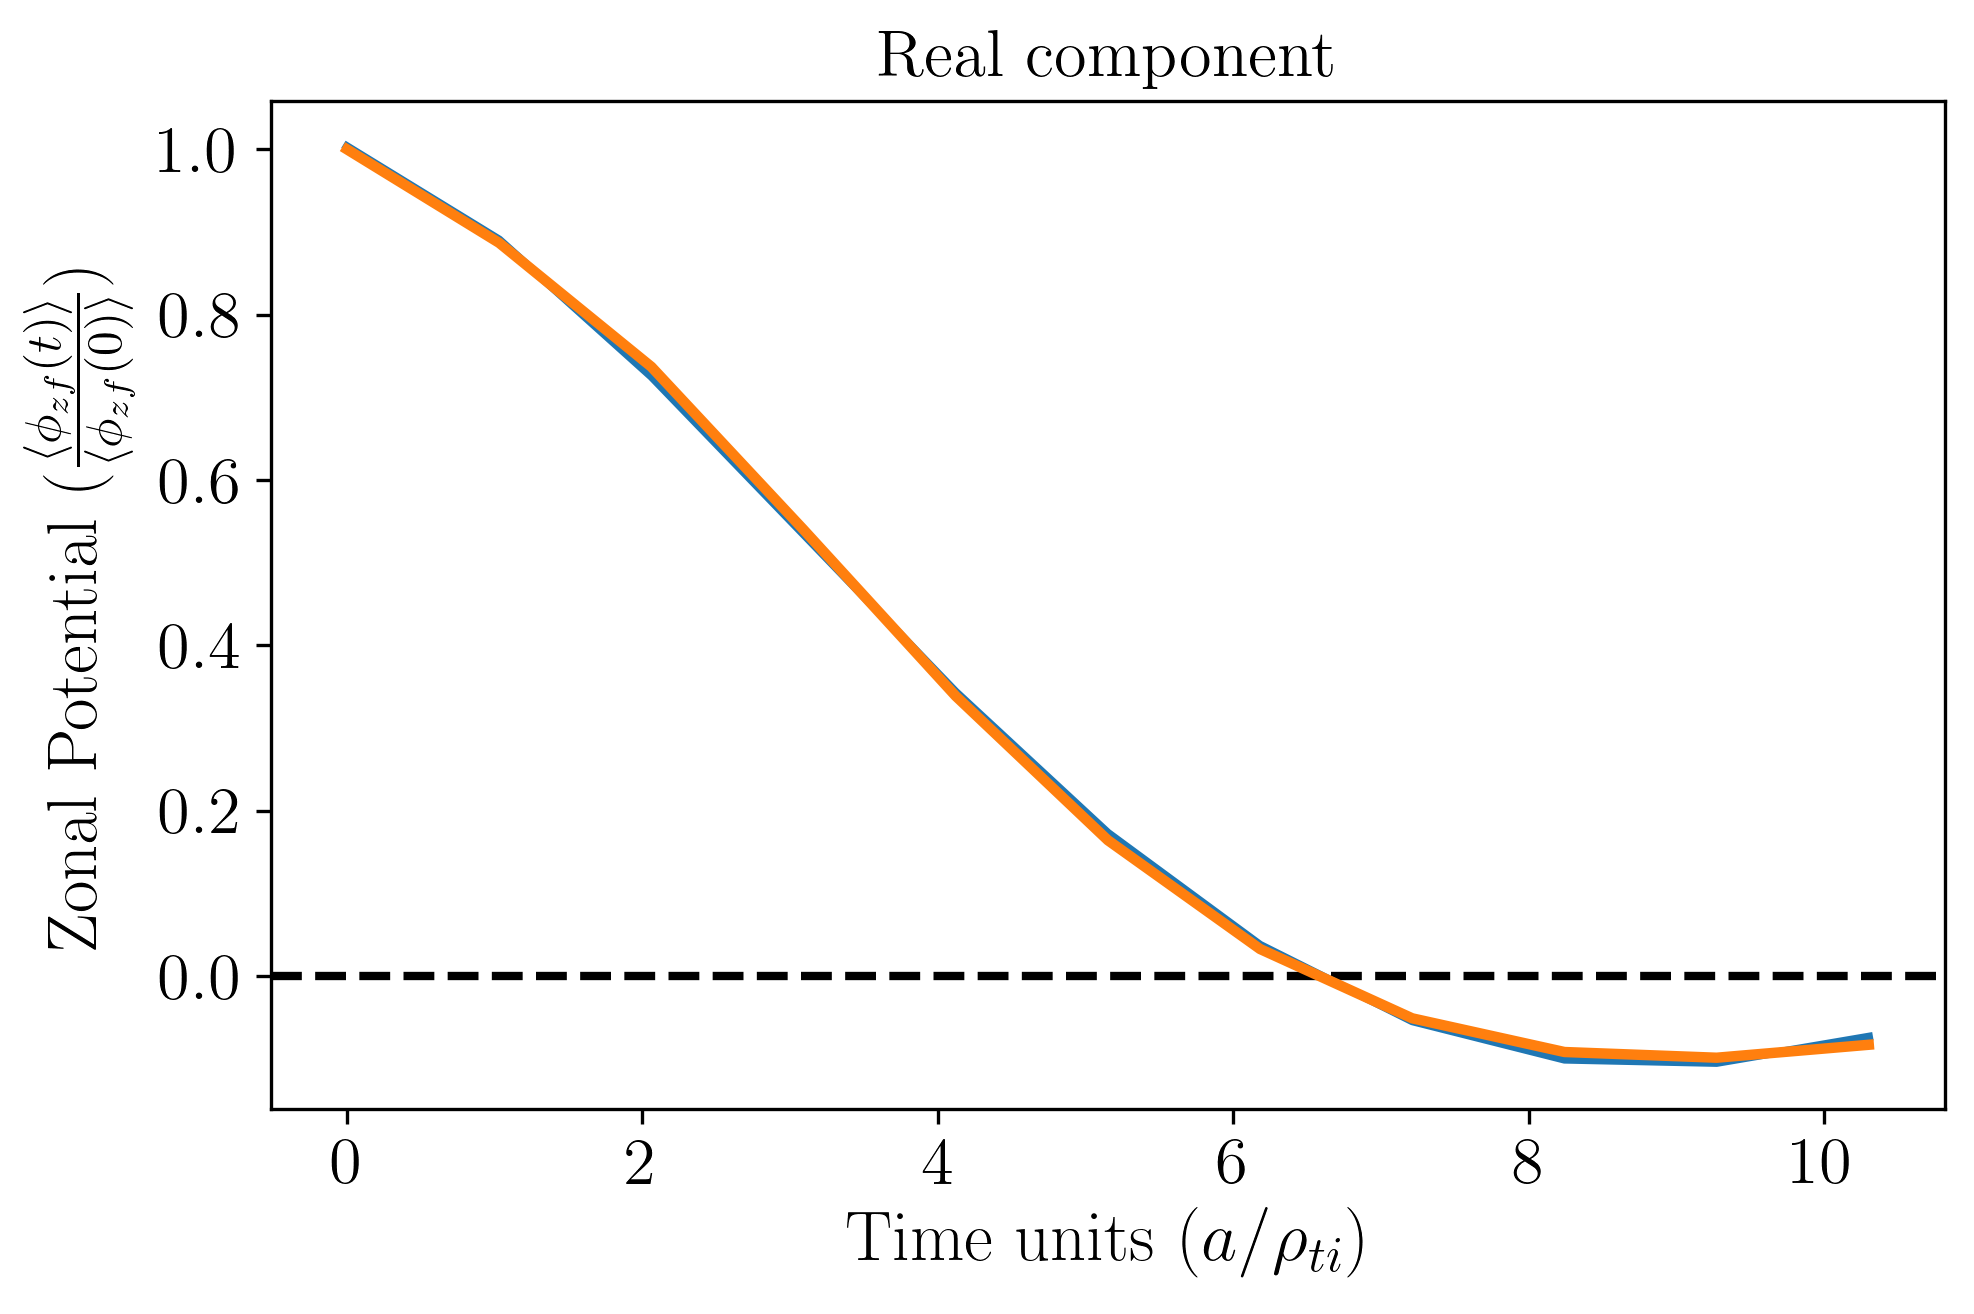

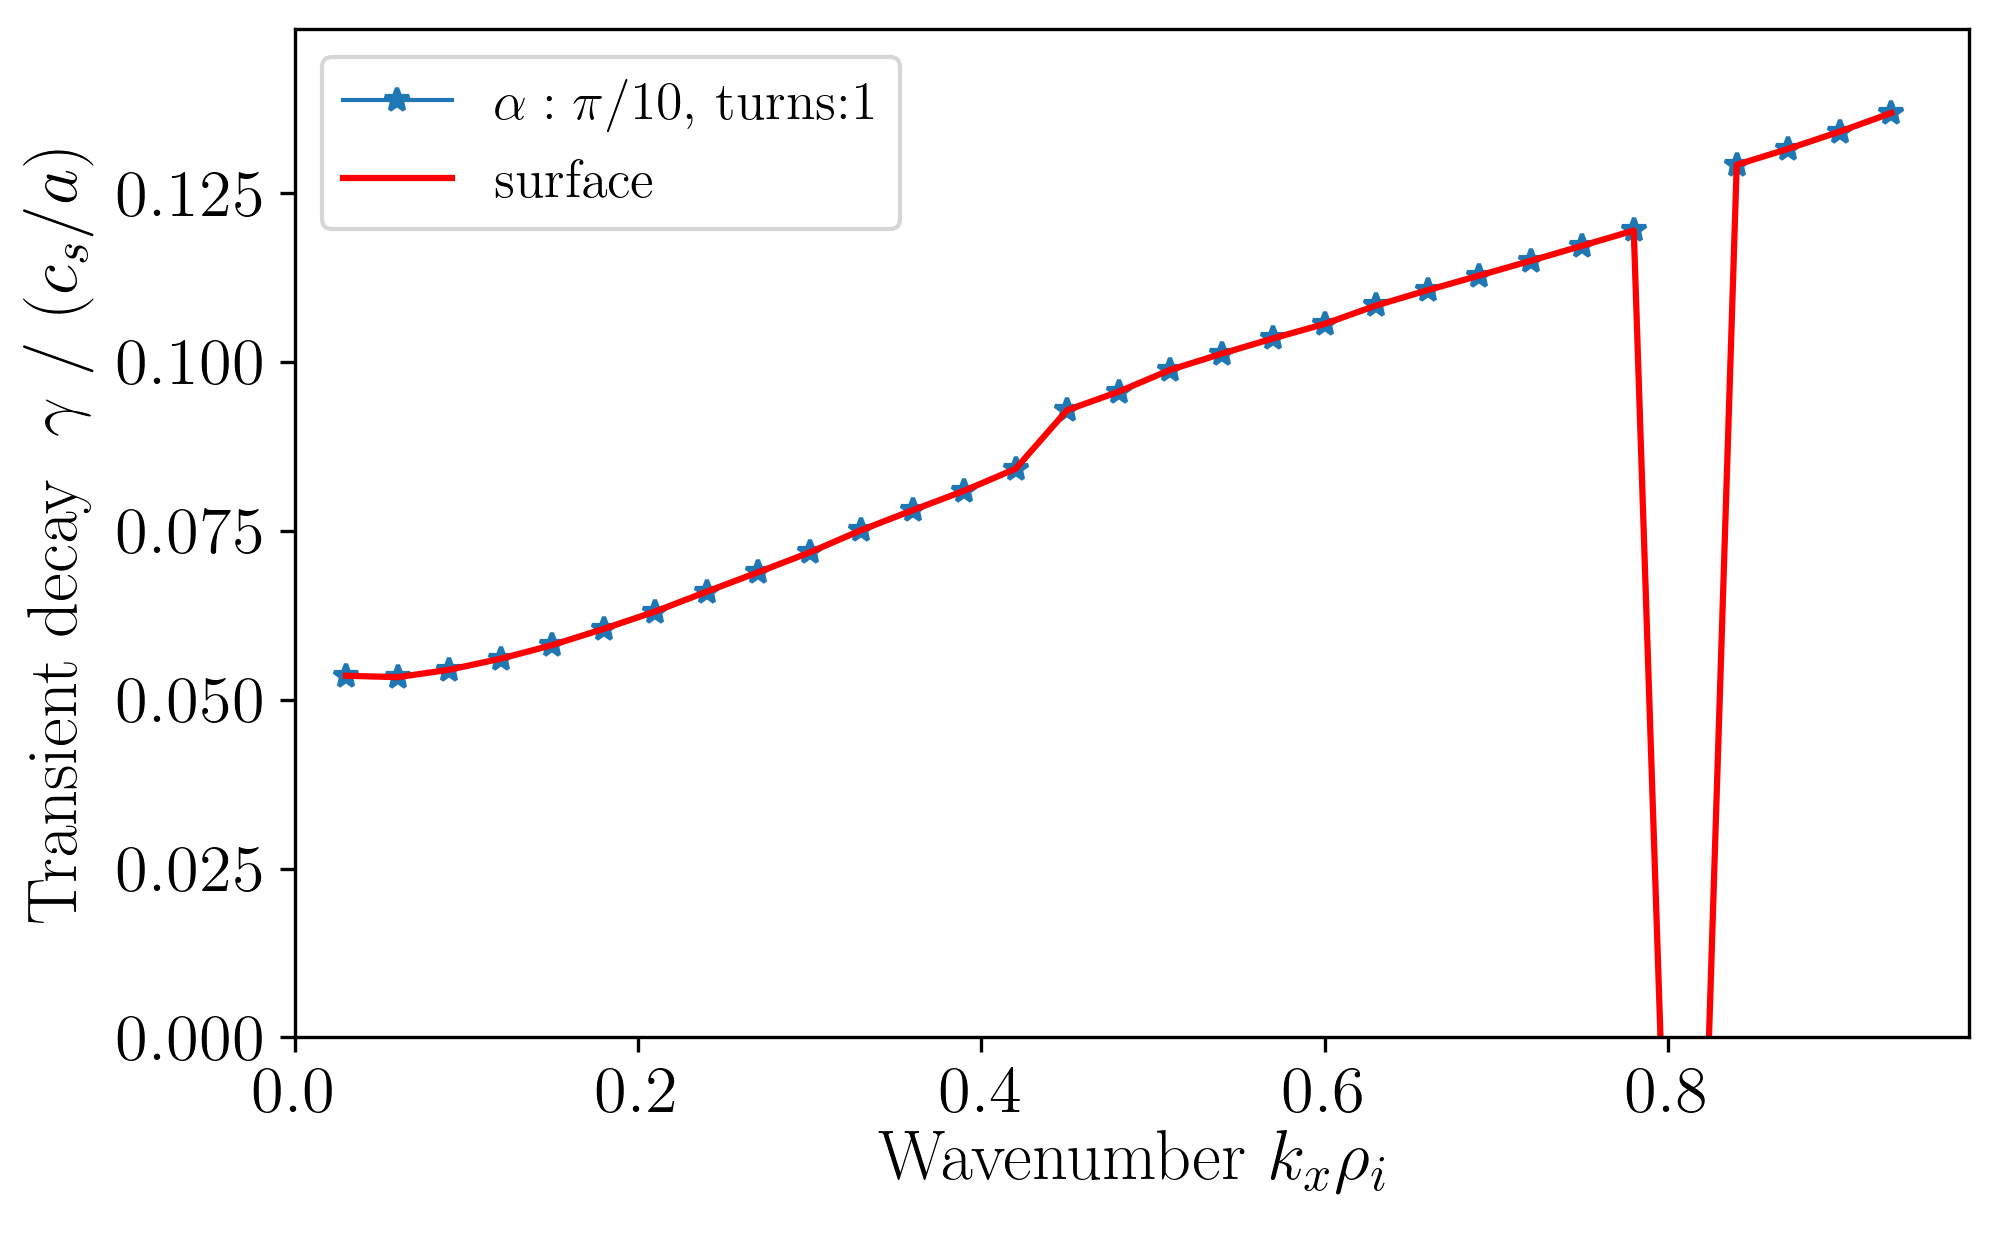

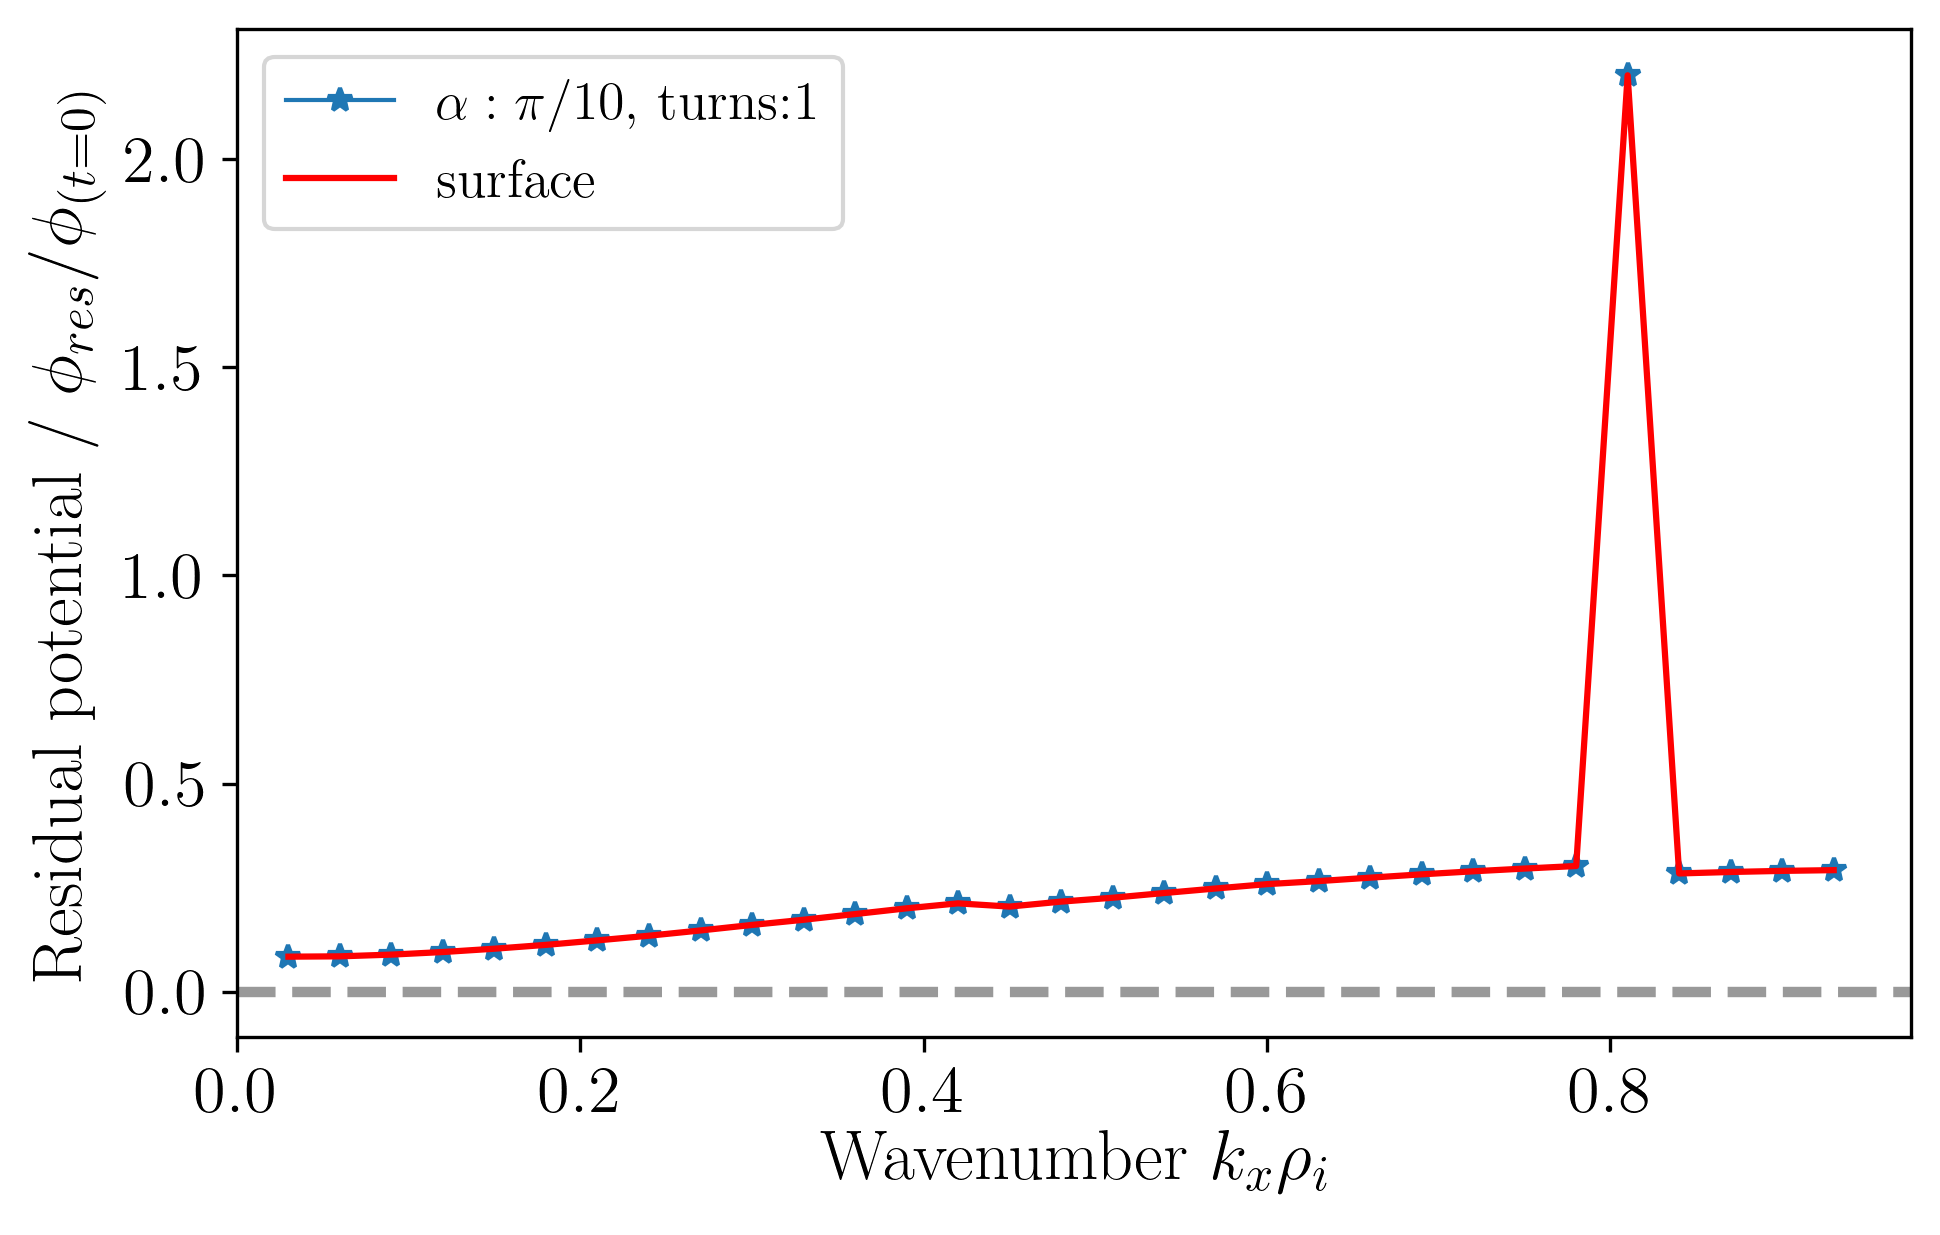

In [8]:
%run /u/cmor/jupyter/HP_project/main.ipynb
t0 = 0
tf = 11
res = 500

%cd /raven/u/cmor/jupyter/HP_project/data/LHD/surface
label   = "surface"
A, gamma_w7x_s, omega_w7x_s, d, res_w7x_s = transient_damping_scan(plot=None)

%cd /raven/u/cmor/jupyter/HP_project/data/LHD/alpha_pi.10_npol_1
label   = "alpha pi/10, npol 1"
A, gamma_10_1, omega_10_1, d, res_10_1 = transient_damping_scan(plot='real')

plt.figure()
plt.plot(kx, gamma_10_1, '-*', label=r"$\alpha:\pi / 10$, turns:1", linewidth=1)
plt.plot(kx, gamma_w7x_s, label=r"surface", linewidth=1.5, color='red')
plt.legend()
plt.xlabel(r"Wavenumber $k_{x} \rho_{i}$")
plt.ylabel(r"Transient decay  \ $\gamma \ / \ (c_{s} / a)$")
plt.ylim(ymin=0)
plt.xlim(xmin=0)
plt.show()

plt.figure()
plt.plot(kx, res_10_1, '-*', label=r"$\alpha:\pi / 10$, turns:1", linewidth=1)
plt.plot(kx, res_w7x_s, label=r"surface", linewidth=1.5, color='red')
plt.legend()
plt.xlabel(r"Wavenumber $k_{x} \rho_{i}$")
plt.ylabel(r"Residual potential / $\phi_{res} / \phi_{(t=0)}$")
# plt.ylim(ymin=0)
plt.xlim(xmin=0)
plt.hlines(y=0, xmin=0, xmax=7, alpha=0.4, linestyle='dashed')
plt.show()